K=3: Accuracy=0.899, AUC=0.153, F1 Score=0.899
K=5: Accuracy=0.893, AUC=0.152, F1 Score=0.893
K=10: Accuracy=0.885, AUC=0.156, F1 Score=0.884
K=25: Accuracy=0.871, AUC=0.166, F1 Score=0.870
K=50: Accuracy=0.848, AUC=0.180, F1 Score=0.846
K=75: Accuracy=0.834, AUC=0.190, F1 Score=0.831
K=100: Accuracy=0.823, AUC=0.198, F1 Score=0.820
K=200: Accuracy=0.799, AUC=0.217, F1 Score=0.793


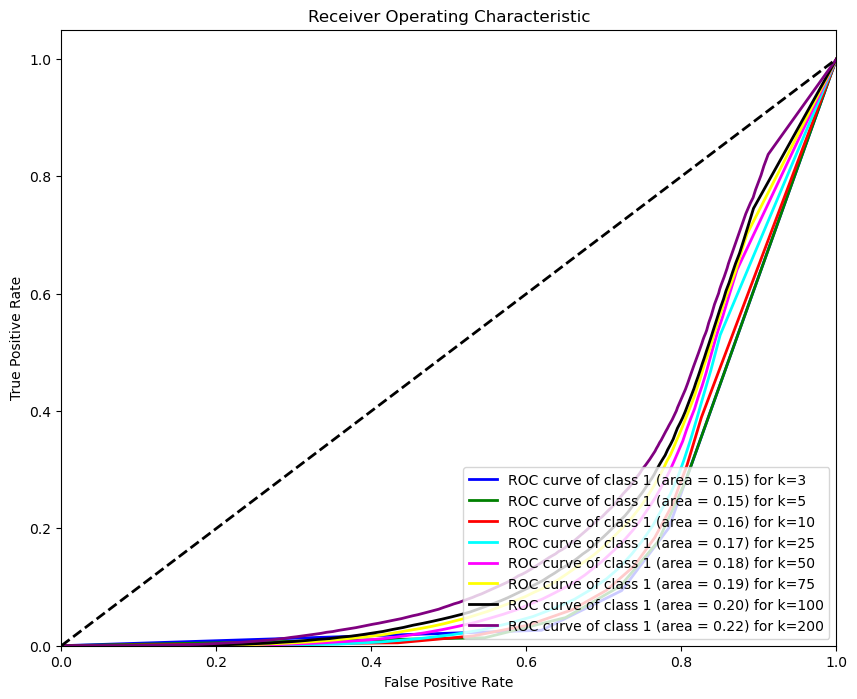

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Load the data
x_train = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/X_train.csv')
y_train = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/y_train.csv')
x_test = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/X_test.csv')
y_test = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/y_test.csv')
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

k_values = [3, 5, 10, 25, 50, 75, 100, 200]

def evaluate_knn(k_values):
    colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple'])
    plt.figure(figsize=(10, 8))
    
    for k, color in zip(k_values, colors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_scaled, y_train)
        y_pred = knn.predict(x_test_scaled)
        y_prob = knn.predict_proba(x_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Compute ROC curve and ROC area for each class in a one-vs-rest manner
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)  # Assuming binary classification for simplicity
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f}) for k={2}'.format(1, roc_auc, k))
        
        print(f"K={k}: Accuracy={accuracy:.3f}, AUC={roc_auc:.3f}, F1 Score={f1:.3f}")
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

evaluate_knn(k_values)


K=200: Balanced Accuracy=0.599, Micro-Average AUC=0.980, Weighted F1 Score=0.793


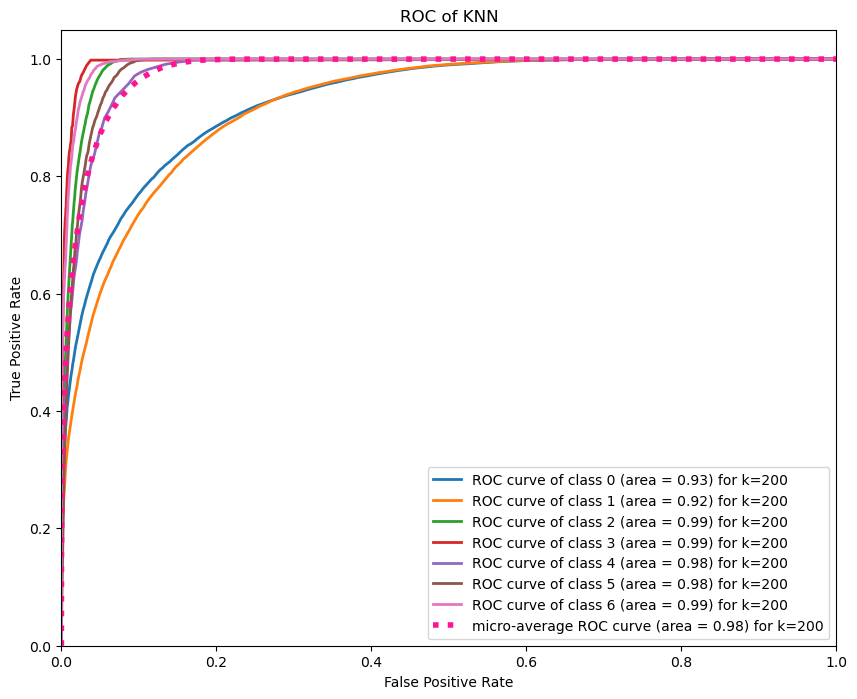

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, balanced_accuracy_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Assuming you have the data loaded as x_train, x_test, y_train, y_test
# Load the data
x_train = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/X_train.csv')
y_train = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/y_train.csv')
x_test = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/X_test.csv')
y_test = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/y_test.csv')
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()
# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

k_values = [200]
n_classes = len(np.unique(y_train))

# Binarize the output for multi-class ROC AUC calculation
y_train_binarized = label_binarize(y_train, classes=np.unique(y_train))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

def evaluate_knn(k_values, x_train_scaled, y_train, x_test_scaled, y_test, n_classes):
    plt.figure(figsize=(10, 8))
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_scaled, y_train)
        y_pred = knn.predict(x_test_scaled)
        y_prob = knn.predict_proba(x_test_scaled)
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"K={k}: Balanced Accuracy={balanced_acc:.3f}, Micro-Average AUC={roc_auc['micro']:.3f}, Weighted F1 Score={f1:.3f}")

        # Plot all ROC curves
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f}) for k={2}'.format(i, roc_auc[i], k))
        
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f}) for k={1}'.format(roc_auc["micro"], k),
                 color='deeppink', linestyle=':', linewidth=4)
    
    # plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of KNN')
    plt.legend(loc="lower right")
    plt.show()

# Call the function with your data
evaluate_knn(k_values, x_train_scaled, y_train, x_test_scaled, y_test, n_classes)


In [7]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

def evaluate_knn(k_values):
    plt.figure(figsize=(10, 8))
    # Assuming you have more than two classes, you need to binarize the output
    classes = np.unique(y_train)
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin = label_binarize(y_test, classes=classes)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_scaled, y_train)
        y_pred = knn.predict(x_test_scaled)
        y_prob = knn.predict_proba(x_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        # Handle multi-class ROC AUC calculation
        if len(classes) > 2:
            auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='macro')
        else:
            fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
            auc_score = auc(fpr, tpr)
            plt.plot(fpr, tpr, linestyle='-', label=f'K={k} (AUC = {auc_score:.2f})')

        f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced classes

        print(f"K={k}: Accuracy={accuracy:.3f}, AUC={auc_score:.3f}, F1 Score={f1:.3f}")

    if len(classes) == 2:
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
    plt.show()

evaluate_knn(k_values)


K=200: Accuracy=0.799, AUC=0.970, F1 Score=0.793


<Figure size 1000x800 with 0 Axes>